Name: T R Hari Subramaniam

Roll: AM.EN.U4CSE19056

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_url = 'https://www.kaggle.com/bingazuran/nsfwsfwdataset2'

In [3]:
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od
od.download(dataset_url)

     |████████████████████████████████| 68 kB 3.1 MB/s 
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bingazuran
Your Kaggle Key: ··········


100%|██████████| 1.12G/1.12G [00:11<00:00, 109MB/s]


In [4]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [5]:
data_dir = './nsfwsfwdataset2/NSFW-FSW-Dataset-Omar-3'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['sfw', 'nsfw']


In [6]:
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
trainset = ImageFolder(data_dir+'/train', transform=transform_train)
testset = ImageFolder(data_dir+'/test', transform=transform_test)

In [9]:
trainset

Dataset ImageFolder
    Number of datapoints: 5000
    Root location: ./nsfwsfwdataset2/NSFW-FSW-Dataset-Omar-3/train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [10]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [11]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [12]:
img, label = trainset[0]
print(img.shape, label)
img

torch.Size([3, 224, 224]) 0


tensor([[[ 0.8745,  0.8745,  0.8745,  ...,  0.7098,  0.7176,  0.7255],
         [ 0.8745,  0.8745,  0.8745,  ...,  0.7176,  0.7176,  0.7255],
         [ 0.8667,  0.8745,  0.8824,  ...,  0.7255,  0.7176,  0.7176],
         ...,
         [ 0.4588,  0.4667,  0.4667,  ...,  0.3255,  0.3725,  0.4118],
         [ 0.4431,  0.4510,  0.4588,  ...,  0.3647,  0.4196,  0.4588],
         [ 0.4353,  0.4431,  0.4510,  ...,  0.3882,  0.4431,  0.4902]],

        [[ 0.3098,  0.3098,  0.3098,  ...,  0.0980,  0.1059,  0.1059],
         [ 0.3098,  0.3098,  0.3098,  ...,  0.1059,  0.1059,  0.1059],
         [ 0.3098,  0.3098,  0.3176,  ...,  0.1137,  0.1059,  0.1059],
         ...,
         [-0.1059, -0.0980, -0.0902,  ..., -0.3176, -0.2392, -0.1843],
         [-0.1137, -0.1059, -0.0980,  ..., -0.2627, -0.1843, -0.1216],
         [-0.1137, -0.1059, -0.0980,  ..., -0.2235, -0.1451, -0.0824]],

        [[ 0.1137,  0.1137,  0.1216,  ..., -0.1294, -0.1216, -0.1137],
         [ 0.1137,  0.1137,  0.1216,  ..., -0

In [13]:
from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
from torchvision import models
batch_size = 16

In [15]:
!git clone https://github.com/lukemelas/EfficientNet-PyTorch
!cd EfficientNet-Pytorch
!pip install -e .
!pip install efficientnet_pytorch

Cloning into 'EfficientNet-PyTorch'...
remote: Enumerating objects: 665, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 665 (delta 26), reused 49 (delta 22), pack-reused 595
Receiving objects: 100% (665/665), 1.14 MiB | 8.73 MiB/s, done.
Resolving deltas: 100% (341/341), done.
/bin/bash: line 0: cd: EfficientNet-Pytorch: No such file or directory
ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: /content
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=527a783f0e3dffda6071bf8250428d0450437366336e0a71812c9d79803ab9d9
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [16]:
#vgg = models.vgg16_bn(pretrained=True)
from efficientnet_pytorch import EfficientNet
effNet = EfficientNet.from_pretrained('efficientnet-b2')   #Intialising efficientnet-b0.

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b2-8bb594d6.pth


  0%|          | 0.00/35.1M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b2


In [17]:
effNet._fc

Linear(in_features=1408, out_features=1000, bias=True)

In [18]:
import torch.nn as nn
num_classes = 2
class EfficientNet_b0(nn.Module):
    def __init__(self):
        super(EfficientNet_b0, self).__init__()
        self.model =EfficientNet.from_pretrained('efficientnet-b2')       # Give variant as per requirement
        
        self.model._fc = nn.Sequential(
            nn.Linear(self.model._fc.in_features, num_classes)                                              # Required if training with NLLLoss
        )
        
    def forward(self, x):
        out = self.model(x)
        return out

In [19]:
effNet = EfficientNet_b0()   # Initialsing an object of the class.

Loaded pretrained weights for efficientnet-b2


In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [21]:
effNet = effNet.to('cuda')    # Load the model to GPU.

In [22]:
opt = optim.Adam(effNet.parameters())     # Defining the optimiser.
loss_fn = nn.CrossEntropyLoss()                            # Defining the loss function
                                                    # Vary optimiser and loss function as per requirement while training.

In [23]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Iteration: 0/313, Loss: 0.73
Iteration: 100/313, Loss: 0.71
Iteration: 200/313, Loss: 0.43
Iteration: 300/313, Loss: 0.38
Epoch: 0/5, Test acc: 88.20, Train acc: 86.90
Iteration: 0/313, Loss: 0.34
Iteration: 100/313, Loss: 0.13
Iteration: 200/313, Loss: 0.32
Iteration: 300/313, Loss: 0.22
Epoch: 1/5, Test acc: 89.40, Train acc: 89.88
Iteration: 0/313, Loss: 0.21
Iteration: 100/313, Loss: 0.41
Iteration: 200/313, Loss: 0.33
Iteration: 300/313, Loss: 0.19
Epoch: 2/5, Test acc: 88.80, Train acc: 90.66
Iteration: 0/313, Loss: 0.26
Iteration: 100/313, Loss: 0.28
Iteration: 200/313, Loss: 0.32
Iteration: 300/313, Loss: 0.03
Epoch: 3/5, Test acc: 89.30, Train acc: 90.26
Iteration: 0/313, Loss: 0.34
Iteration: 100/313, Loss: 0.19
Iteration: 200/313, Loss: 0.82
Iteration: 300/313, Loss: 0.25
Epoch: 4/5, Test acc: 87.30, Train acc: 88.72


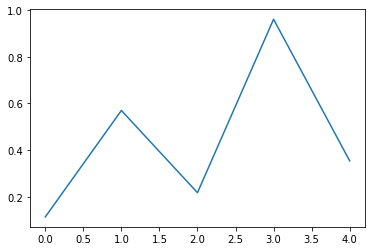

In [24]:
loss_epoch_arr = []
max_epochs = 5

n_iters = np.ceil(5000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = effNet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, effNet), evaluation(trainloader, effNet)))
    
plt.plot(loss_epoch_arr)
plt.show()

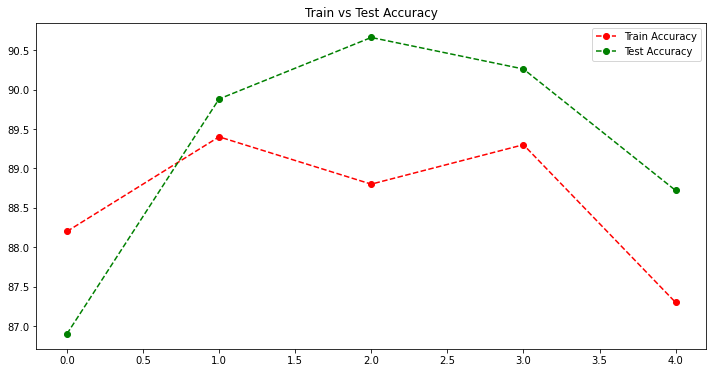

In [25]:
trainlist = [88.2,89.4,88.8,89.3,87.3]
testlist = [86.9,89.88,90.66,90.26,88.72]

plt.figure(figsize=(12,6));
plt.plot(trainlist, 'o--r');
plt.plot(testlist,'o--g');
#plt.xlabel('Year')
#plt.ylabel('Temperature variation')
plt.title('Train vs Test Accuracy');
plt.legend(['Train Accuracy','Test Accuracy']);